In [7]:
import pandas as pd
import re
import string
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Load dataset
df = pd.read_csv("../data/processed/dataset_integrated_cleanv1.csv")

print("Jumlah data:", len(df))
print("Kolom:", df.columns.tolist())
df.head()


Jumlah data: 3074
Kolom: ['id', 'url', 'domain', 'date', 'title', 'text', 'source_type', 'dataset_origin', 'fp_new', 'label', 'label_str']


,id,url,domain,date,title,text,source_type,dataset_origin,fp_new,label,label_str
0,1,https://nasional.kompas.com/read/2024/10/20/22533711/profil-menko-hukum-ham-yusril-ihza-mahendra-di-kabinet-prabowo-gibran,nasional.kompas.com,2024-10-19 17:00:00,Profil Menko Hukum HAM Yusril Ihza Mahendra di Kabinet Prabowo-Gibran,"Profil Yusril Ihza Mahendra kembali menjadi sorotan publik setelah ditunjuk Presiden RI 2024-2029 Prabowo Subianto, menjadi Menteri Koordinator Bidang Hukum, Hak Asasi Manusia (HAM), Imigrasi, dan Pemasyarakatan. Dia didapuk menjadi anggota Kabinet Merah Putih pemerintahan Presiden Prabowo Subia...",news,news,23513bdeb23b8bee,1,valid
1,2,https://nasional.kompas.com/read/2024/10/20/23214911/profil-menteri-pppa-arifatul-choiri-fauzi-di-kabinet-prabowo-gibran,nasional.kompas.com,2024-10-19 17:00:00,Profil Menteri PPPA Arifatul Choiri Fauzi di Kabinet Prabowo-Gibran,Profil Arifatul Choiri Fauzi menjadi sorotan setelah ditunjuk menjadi Menteri Pemberdayaan Perempuan dan Perlindungan Anak (PPPA) Indonesia 2024-2029 Prabowo Subianto. Pengumuman anggota Kabinet Merah Putih pemerintahan Presiden Prabowo Subianto-Wakil Presiden Gibran Rakabuming Raka dilakukan di...,news,news,36475796eefc06be,1,valid
2,3,https://nasional.kompas.com/read/2024/10/20/22470301/prabowo-tunjuk-yassierlijadi-menteri-ketenagakerjaan,nasional.kompas.com,2024-10-19 17:00:00,Prabowo Tunjuk Yassierli Jadi Menteri Ketenagakerjaan,"Presiden Prabowo Subianto menunjuk Guru Besar Institut Teknologi Bandung (ITB) Prof Yassierli sebagai Menteri Ketenagakerjaan pada Minggu (20/10/2024) malam. “Prof Yassierli sebagai Menteri Ketenagakerjaan,” kata Prabowo. Yassierli menggantikan menteri sebelumnya di Kementerian Ketenagakerjaan, ...",news,news,f53295bffa2d5d26,1,valid
3,4,https://www.kompas.com/tren/read/2024/10/20/224623365/profil-yassierli-menteri-ketenagakerjaan-kabinet-prabowo-gibran,www.kompas.com,2024-10-19 17:00:00,"Profil Yassierli, Menteri Ketenagakerjaan Kabinet Prabowo-Gibran",", 20 Oktober 2024, 22:46 WIB Erwina Rachmi Puspapertiwi, Rizal Setyo Nugroho Tim Redaksi Lihat Foto",news,news,f97bb89fa609916e,1,valid
4,5,https://health.kompas.com/read/24J20220000968/apa-yang-harus-dilakukan-di-usia-30-tahun-untuk-hidup-panjang-umur-,health.kompas.com,2024-10-20 15:00:00,Apa yang Harus Dilakukan di Usia 30 Tahun untuk Hidup Panjang Umur?,"Di usia 30-an tahun, kita bisa melakukan beberapa hal untuk meningkatkan peluang hidup panjang umur. Mengutip Very Well Health, cara Anda menjaga kesehatan dan kesejahteraan selama usia 30-an tahun akan sangat menentukan kesehatan Anda selama sisa hidup Anda. Rahasia memiliki umur panjang tanpa ...",news,news,93aa407e4545f7a4,1,valid


In [8]:
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emotikon
        "\U0001F300-\U0001F5FF"  # simbol & pictograph
        "\U0001F680-\U0001F6FF"  # transport & map symbol
        "\U0001F1E0-\U0001F1FF"  # bendera
        "\U00002700-\U000027BF"  # simbol tambahan
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", " ", text)   # hapus URL
    text = re.sub(r"@\w+", " ", text)                      # hapus mention (@username)
    text = re.sub(r"#\w+", " ", text)                      # hapus hashtag
    text = remove_emoji(text)                              # hapus emoji
    text = re.sub(r"[^a-zA-Z\s]", " ", text)               # hapus angka dan simbol
    text = re.sub(r"\s+", " ", text).strip()               # hapus spasi berlebih
    return text


In [12]:
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

df["text_clean"] = df["text"].apply(clean_text)
df["text_clean"] = df["text_clean"].apply(lambda x: stopword_remover.remove(x))

df[["text", "text_clean"]].head(10)


,text,text_clean
0,"Profil Yusril Ihza Mahendra kembali menjadi sorotan publik setelah ditunjuk Presiden RI 2024-2029 Prabowo Subianto, menjadi Menteri Koordinator Bidang Hukum, Hak Asasi Manusia (HAM), Imigrasi, dan Pemasyarakatan. Dia didapuk menjadi anggota Kabinet Merah Putih pemerintahan Presiden Prabowo Subia...",profil yusril ihza mahendra menjadi sorotan publik ditunjuk presiden ri prabowo subianto menjadi menteri koordinator bidang hukum hak asasi manusia ham imigrasi pemasyarakatan didapuk menjadi anggota kabinet merah putih pemerintahan presiden prabowo subianto wakil presiden gibran rakabuming raka...
1,Profil Arifatul Choiri Fauzi menjadi sorotan setelah ditunjuk menjadi Menteri Pemberdayaan Perempuan dan Perlindungan Anak (PPPA) Indonesia 2024-2029 Prabowo Subianto. Pengumuman anggota Kabinet Merah Putih pemerintahan Presiden Prabowo Subianto-Wakil Presiden Gibran Rakabuming Raka dilakukan di...,profil arifatul choiri fauzi menjadi sorotan ditunjuk menjadi menteri pemberdayaan perempuan perlindungan anak pppa indonesia prabowo subianto pengumuman anggota kabinet merah putih pemerintahan presiden prabowo subianto wakil presiden gibran rakabuming raka dilakukan istana negara jakarta mingg...
2,"Presiden Prabowo Subianto menunjuk Guru Besar Institut Teknologi Bandung (ITB) Prof Yassierli sebagai Menteri Ketenagakerjaan pada Minggu (20/10/2024) malam. “Prof Yassierli sebagai Menteri Ketenagakerjaan,” kata Prabowo. Yassierli menggantikan menteri sebelumnya di Kementerian Ketenagakerjaan, ...",presiden prabowo subianto menunjuk guru besar institut teknologi bandung itb prof yassierli menteri ketenagakerjaan minggu malam prof yassierli menteri ketenagakerjaan kata prabowo yassierli menggantikan menteri sebelumnya kementerian ketenagakerjaan ida fauziah baca prabowo tunjuk rosan roeslan...
3,", 20 Oktober 2024, 22:46 WIB Erwina Rachmi Puspapertiwi, Rizal Setyo Nugroho Tim Redaksi Lihat Foto",oktober wib erwina rachmi puspapertiwi rizal setyo nugroho tim redaksi lihat foto
4,"Di usia 30-an tahun, kita bisa melakukan beberapa hal untuk meningkatkan peluang hidup panjang umur. Mengutip Very Well Health, cara Anda menjaga kesehatan dan kesejahteraan selama usia 30-an tahun akan sangat menentukan kesehatan Anda selama sisa hidup Anda. Rahasia memiliki umur panjang tanpa ...",usia an tahun melakukan beberapa meningkatkan peluang hidup panjang umur mengutip very well health cara menjaga kesehatan kesejahteraan selama usia an tahun sangat menentukan kesehatan selama sisa hidup rahasia memiliki umur panjang sakit sakitan dicapai menjaga kebiasaan sehat gaya hidup sehat ...
5,"Presiden RI Prabowo Subianto resmi menunjuk tokoh Muslimat Nahdlatul Ulama Arifatul Choiri Fauzi sebagai Menteri Pemberdayaan Perempuan dan Perlindungan Anak. ""Arifatul Choiri Fauzi Menteri Pemberdayaan Perempuan dan Perlindungan Anak,"" ujar Prabowo di Istana Negara Jakarta, Minggu (20/10/2024)....",presiden ri prabowo subianto resmi menunjuk tokoh muslimat nahdlatul ulama arifatul choiri fauzi menteri pemberdayaan perempuan perlindungan anak arifatul choiri fauzi menteri pemberdayaan perempuan perlindungan anak ujar prabowo istana negara jakarta minggu arifatul choiri fauzi merupakan sosok...
6,"Nama Fadli Zon ditunjuk Prabowo sebagai Menteri Kebudayaan di kabinet era Prabowo-Gibran. Para Menteri dan wakil Menteri era Prabowo Subianto diumumkan malam ini, Minggu (20/10/2024). Baca juga: Nadiem Makarim Yakin Pemerintahan Prabowo-Gibran Bisa Tingkatkan Kualitas Pendidikan Profil Fadli Zon...",nama fadli zon ditunjuk prabowo menteri kebudayaan kabinet era prabowo gibran menteri wakil menteri era prabowo subianto diumumkan malam minggu baca nadiem makarim yakin pemerintahan prabowo gibran tingkatkan kualitas pendidikan profil fadli zon menteri kebudayaan kabinet merah putih kabinet mer...
7,"Menteri Pendidikan, Kebudayaan, Riset, dan Teknologi (Mendikbud Ristek) Nadiem Makarim mengucapkan selamat pada Prabowo Subianto dan Gibran Rakabuming Raka yang telah dil

In [13]:
before = len(df)
df = df.drop_duplicates(subset="text_clean")
df = df.dropna(subset=["text_clean"])
after = len(df)

print(f"Dihapus {before - after} baris duplikat atau kosong.")
df.info()


Dihapus 0 baris duplikat atau kosong.
<class 'pandas.core.frame.DataFrame'>
Index: 3068 entries, 0 to 3073
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3068 non-null   int64 
 1   url             3068 non-null   object
 2   domain          3068 non-null   object
 3   date            3068 non-null   object
 4   title           3068 non-null   object
 5   text            3068 non-null   object
 6   source_type     3068 non-null   object
 7   dataset_origin  3068 non-null   object
 8   fp_new          3068 non-null   object
 9   label           3068 non-null   int64 
 10  label_str       3068 non-null   object
 11  text_clean      3068 non-null   object
dtypes: int64(2), object(10)
memory usage: 311.6+ KB


Distribusi Label:
label
1    0.617666
0    0.382334
Name: proportion, dtype: float64


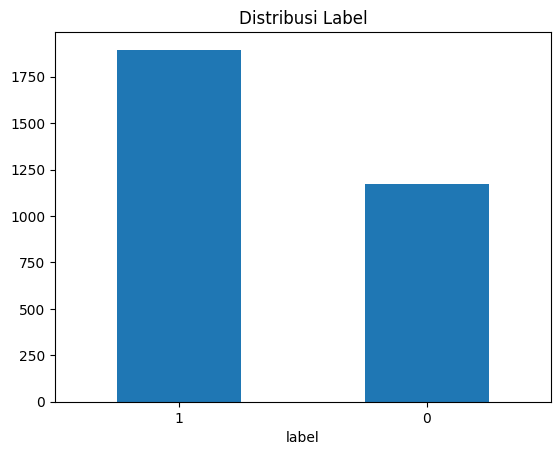

In [14]:
print("Distribusi Label:")
print(df["label"].value_counts(normalize=True))

import matplotlib.pyplot as plt
df["label"].value_counts().plot(kind="bar", title="Distribusi Label", rot=0)
plt.show()


In [15]:
output_path = "../data/processed/dataset_clean_finalv1.csv"
df.to_csv(output_path, index=False)

print(f"✅ Data sudah dibersihkan dan disimpan ke: {output_path}")
print("Jumlah data akhir:", len(df))


✅ Data sudah dibersihkan dan disimpan ke: ../data/processed/dataset_clean_finalv1.csv
Jumlah data akhir: 3068
